## Utilizând Modele Pre-antrenate
În acest exercițiu vom arăta cum să încărcați modele pre-antrenate precum VGG16 și ResNet. Acesta este un exercițiu destul de simplu conceput pentru a vă familiariza cu modelele precum VGG și ResNet și rezultatele pe care le oferă.

Veți încărca modelele VGG și ResNet. Apoi veți folosi camera laptopului pentru a face o fotografie. Apoi veți rula fotografia prin aceste modele pentru a vedea rezultatele.

De asemenea, puteți face fotografii singuri și să le încărcați manual. Sau puteți găsi imagini pe internet și să le descărcați.

Uitați-vă la rezultatele pentru cel puțin 5 fotografii diferite și luați în considerare:

- Au obținut modelele răspunsul "corect"? A fost răspunsul "corect" pe listă?
- Cât de încrezătoare a fost predicția (a avut alegerea de top o probabilitate aproape de 1)?
- Cum a gestionat modelul imaginile cu mai multe obiecte în ele? (de exemplu, imaginea scaunului de leagăn)
- Care au fost câteva dintre răspunsurile "greșite" de pe listă? Puteți înțelege de ce clasificatorul de imagini ar fi putut crede că acele alte răspunsuri erau corecte?

In [6]:
# Instalați OpenCV dacă nu l-ați instalat încă
# conda install -c https://conda.binstar.org/menpo opencv3
# pip install pillow

In [29]:
from PIL import Image
from keras.preprocessing import image
import numpy as np
import pandas as pd

import cv2
from matplotlib.image import imread 
import matplotlib.pyplot as plt
from PIL import Image

%matplotlib inline

ImportError: cannot import name 'img_to_array' from 'keras.preprocessing.image' (C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\preprocessing\image.py)

In [8]:
def get_image(camera):
    retval, im = camera.read()
    return im

In [9]:
def save_webcam_image(img_path):

    try:
        camera_port = 0
        ramp_frames = 10
    
        camera = cv2.VideoCapture(camera_port)

        for i in range(ramp_frames):
            retval, im_camera = camera.read()

        retval, im_camera = camera.read()

        im = cv2.resize(im_camera, (224, 224)).astype(np.float32)
        cv2.imwrite(img_path, im)
        del (camera)
        return True
    except ValueError as e:
        print("Image Capture Failed")
    return False

In [12]:
img_path = "webcam_test_img.png"

if save_webcam_image(img_path) is False:
    # Camera web nu este activă, utilizați imaginea scaunului de lemn care se leagănă
    img_path = "rocking_chair.jpg"
    print("Using the Test Rocking Chair Image: {}".format(img_path))

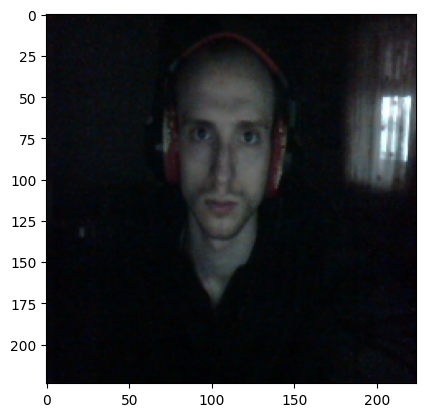

In [13]:
plt.imshow(imread(img_path))

## VGG16 - Model Pre-antrenat

In [14]:
from keras.applications import vgg16


vgg16_model = vgg16.VGG16(weights='imagenet')
vgg16_model.summary()

553467096/553467096 [==============================] - 13s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                           

In [32]:
# Funcție utilitară pentru încărcarea imaginii, preprocesarea intrării și a țintelor
def predict_image(model, img_path, preprocess_input_fn, decode_predictions_fn, target_size=(224, 224)):

    img = Image.open(img_path)
    x = np.array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input_fn(x)
    
    preds = model.predict(x)
    predictions_df = pd.DataFrame(decode_predictions_fn(preds, top=10)[0])
    predictions_df.columns = ["Predicted Class", "Name", "Probability"]
    return predictions_df

In [33]:
#img_path="rocking_chair.png"  ## Deblocați aceasta și introduceți calea către fișierul dvs. aici, dacă doriți
# Preziceți Rezultate
predict_image(vgg16_model, img_path, vgg16.preprocess_input, vgg16.decode_predictions)

1/1 [==============================] - 1s 714ms/step


,Predicted Class,Name,Probability
0,n04456115,torch,0.111898
1,n03590841,jack-o'-lantern,0.049340
2,n03325584,feather_boa,0.025712
3,n02948072,candle,0.025114
4,n02883205,bow_tie,0.020051
5,n03670208,limousine,0.019893
6,n04350905,suit,0.018915
7,n04286575,spotlight,0.016863
8,n03141823,crutch,0.014600
9,n04584207,wig,0.014428


## ResNet50 - Model pre-instruit

In [ ]:
## Definește un model Resnet și tipărește rezumatul modelului (urmează aceeași procedură ca în VGGNet)
## Acesta va descărca ponderile, ceea ce ar putea dura ceva timp
## De asemenea, rezumatul va fi destul de lung, deoarece Resnet50 este o rețea mult mai mare decât VGG16

In [ ]:
# Prezicerea rezultatelor

In [34]:
from tensorflow.keras.applications import ResNet50

# Incarca modelul ResNet50 pre-antrenat
model = ResNet50(weights='imagenet')

# Afiseaza rezumatul modelului
model.summary()


102967424/102967424 [==============================] - 3s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                        

 conv3_block2_2_conv (Conv2  (None, 28, 28, 128)          147584    ['conv3_block2_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_block2_2_bn (BatchNo  (None, 28, 28, 128)          512       ['conv3_block2_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv3_block2_2_relu (Activ  (None, 28, 28, 128)          0         ['conv3_block2_2_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv3_block2_3_conv (Conv2  (None, 28, 28, 512)          66048     ['conv3_block2_2_relu[0][0]'] 
 D)       

                                                                                                  
 conv4_block1_1_bn (BatchNo  (None, 14, 14, 256)          1024      ['conv4_block1_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block1_1_relu (Activ  (None, 14, 14, 256)          0         ['conv4_block1_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_block1_2_conv (Conv2  (None, 14, 14, 256)          590080    ['conv4_block1_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv4_blo

 D)                                                                                               
                                                                                                  
 conv4_block3_3_bn (BatchNo  (None, 14, 14, 1024)         4096      ['conv4_block3_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block3_add (Add)      (None, 14, 14, 1024)         0         ['conv4_block2_out[0][0]',    
                                                                     'conv4_block3_3_bn[0][0]']   
                                                                                                  
 conv4_block3_out (Activati  (None, 14, 14, 1024)         0         ['conv4_block3_add[0][0]']    
 on)                                                                                              
          

 conv4_block6_2_bn (BatchNo  (None, 14, 14, 256)          1024      ['conv4_block6_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block6_2_relu (Activ  (None, 14, 14, 256)          0         ['conv4_block6_2_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_block6_3_conv (Conv2  (None, 14, 14, 1024)         263168    ['conv4_block6_2_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv4_block6_3_bn (BatchNo  (None, 14, 14, 1024)         4096      ['conv4_block6_3_conv[0][0]'] 
 rmalizati

                                                                                                  
 conv5_block3_1_conv (Conv2  (None, 7, 7, 512)            1049088   ['conv5_block2_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv5_block3_1_bn (BatchNo  (None, 7, 7, 512)            2048      ['conv5_block3_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv5_block3_1_relu (Activ  (None, 7, 7, 512)            0         ['conv5_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv5_blo